In [22]:
import call_for_data
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
df1= None
df1 = call_for_data.make_master_dataframe("milwaukee", 6, 23)

In [24]:
test_frame = df1
test_frame

,date,temperature_2m,precipitation,cloud_cover,wind_speed_100m
0,2024-06-16 06:00:00,69.266304,0.0,100.0,35.516148
1,2024-06-16 07:00:00,68.366302,0.0,99.0,36.224300
2,2024-06-16 08:00:00,68.006302,0.0,100.0,35.900860
3,2024-06-16 09:00:00,68.186302,0.0,100.0,35.391861
4,2024-06-16 10:00:00,67.556297,0.0,100.0,35.690872
...,...,...,...,...,...
355,1981-07-01 01:00:00,62.834000,0.0,0.0,32.217484
356,1981-07-01 02:00:00,62.293999,0.0,0.0,33.626774
357,1981-07-01 03:00:00,62.203999,0.0,0.0,34.322937
358,1981-07-01 04:00:00,62.473995,0.0,3.0,33.651817


In [25]:
# step 1 should be to convert UTC to local time
# step 2 should be to split the day from the hour
# step 3 should be groupby hour - should result in 24 groups
# step 4 should be analysis of the group data
#we should probably use boolean to evaluate the chance of rain or clouds

In [26]:
# step 1 - converting to local time
test_frame['local'] = test_frame['date'].dt.tz_localize('utc').dt.tz_convert('America/Chicago')
test_frame = test_frame.drop('date', axis=1)

In [27]:
test_frame

,temperature_2m,precipitation,cloud_cover,wind_speed_100m,local
0,69.266304,0.0,100.0,35.516148,2024-06-16 01:00:00-05:00
1,68.366302,0.0,99.0,36.224300,2024-06-16 02:00:00-05:00
2,68.006302,0.0,100.0,35.900860,2024-06-16 03:00:00-05:00
3,68.186302,0.0,100.0,35.391861,2024-06-16 04:00:00-05:00
4,67.556297,0.0,100.0,35.690872,2024-06-16 05:00:00-05:00
...,...,...,...,...,...
355,62.834000,0.0,0.0,32.217484,1981-06-30 20:00:00-05:00
356,62.293999,0.0,0.0,33.626774,1981-06-30 21:00:00-05:00
357,62.203999,0.0,0.0,34.322937,1981-06-30 22:00:00-05:00
358,62.473995,0.0,3.0,33.651817,1981-06-30 23:00:00-05:00


In [28]:
#create a checkpoint to avoid having to restart kernel
test_frame2 = test_frame

In [29]:
#step 2 - splitting day from hour
test_frame2['Dates'] = pd.to_datetime(test_frame2['local']).dt.date
test_frame2['Time'] = pd.to_datetime(test_frame2['local']).dt.time
test_frame2 = test_frame.drop('local', axis=1)
test_frame2

,temperature_2m,precipitation,cloud_cover,wind_speed_100m,Dates,Time
0,69.266304,0.0,100.0,35.516148,2024-06-16,01:00:00
1,68.366302,0.0,99.0,36.224300,2024-06-16,02:00:00
2,68.006302,0.0,100.0,35.900860,2024-06-16,03:00:00
3,68.186302,0.0,100.0,35.391861,2024-06-16,04:00:00
4,67.556297,0.0,100.0,35.690872,2024-06-16,05:00:00
...,...,...,...,...,...,...
355,62.834000,0.0,0.0,32.217484,1981-06-30,20:00:00
356,62.293999,0.0,0.0,33.626774,1981-06-30,21:00:00
357,62.203999,0.0,0.0,34.322937,1981-06-30,22:00:00
358,62.473995,0.0,3.0,33.651817,1981-06-30,23:00:00


In [30]:
#step 3, group by hour
time_groups = test_frame.groupby('Time')

In [31]:
#step 4 analysis of data by hour
summary = time_groups.describe()

In [32]:
summery_plottable = summary['temperature_2m'].drop('count', axis=1)

<Axes: xlabel='Time'>

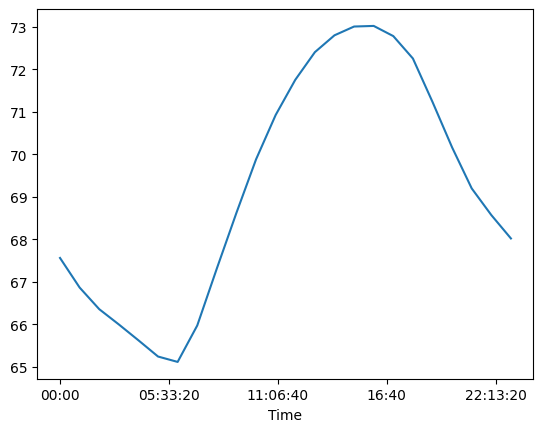

In [33]:
summery_plottable['mean'].plot()

In [34]:

#the first thing we should do is group the data by period of day
#currently there is an hourly breakdown - lets take each hour and assign to a group:
# wee hours 00:00-5:00
# morning: 5:00 - 12:00
# afternoon: 12:00-17:00
# evening: 17:00-20:00
# night: 20:00-24:00

In [35]:
hour_to_filter = 12
filtered_rows = df1[df1['date'].dt.hour == hour_to_filter]

In [36]:
filtered_rows["temperature_2m"].mean()

np.float32(65.975334)

In [37]:
filtered_rows["temperature_2m"].median()

np.float32(66.254)

In [38]:
filtered_rows["temperature_2m"].min()

np.float32(48.794)

In [39]:
filtered_rows["temperature_2m"].max()

np.float32(82.2263)

In [40]:
#can we generate a bell curve?

In [41]:
hours = range(0, 24)
output_dict = {}
for hour in hours:
    hour_to_eval = hour
    filtered_rows = df1[df1['date'].dt.hour == hour_to_eval]
    hour_min = filtered_rows["temperature_2m"].min()
    hour_mean = filtered_rows["temperature_2m"].mean()
    hour_median = filtered_rows["temperature_2m"].median()
    hour_max = filtered_rows["temperature_2m"].max()
    output_dict[hour_to_eval] = (hour_min, hour_mean, hour_median, hour_max)

In [42]:
output_dict

{0: (np.float32(52.753998),
  np.float32(71.23201),
  np.float32(71.069),
  np.float32(93.4763)),
 1: (np.float32(51.854),
  np.float32(70.16264),
  np.float32(70.190155),
  np.float32(91.4063)),
 2: (np.float32(51.134),
  np.float32(69.198685),
  np.float32(69.313995),
  np.float32(88.7963)),
 3: (np.float32(50.774002),
  np.float32(68.57196),
  np.float32(68.84015),
  np.float32(87.6263)),
 4: (np.float32(50.414),
  np.float32(68.021736),
  np.float32(68.234),
  np.float32(86.324)),
 5: (np.float32(50.144),
  np.float32(67.563416),
  np.float32(67.604),
  np.float32(86.054)),
 6: (np.float32(49.874),
  np.float32(66.86769),
  np.float32(67.063995),
  np.float32(85.604)),
 7: (np.float32(48.974),
  np.float32(66.359184),
  np.float32(66.703995),
  np.float32(84.883995)),
 8: (np.float32(48.794),
  np.float32(65.99987),
  np.float32(66.59015),
  np.float32(84.254)),
 9: (np.float32(48.614002),
  np.float32(65.626915),
  np.float32(66.254),
  np.float32(83.264)),
 10: (np.float32(48.434